In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri
import networkx as nx
import numba as nb

In [2]:
def crossiterate(L1, L2): return [(a, b) for a in L1 for b in L2 if a != b]
def glue(alofarraylike, L2=None): return np.vstack(alofarraylike) if L2 is None else np.vstack((alofarraylike, L2))

In [3]:
print(crossiterate([0,1,2,3],[0,1,2,3]))
print(glue(([0,1,2,3],[0,1,2,3],[0,1,2,3],[0,1,2,3])))
print(glue([0,1,2,3],[0,1,2,3]))

[(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (3, 0), (3, 1), (3, 2)]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 1 2 3]
 [0 1 2 3]]


- key: 1:n
- pos: 2:n
- pointkeys: 3:n

***Keys should be integers, and unique to each point.***

In [4]:
def point(keys, pos): return glue(keys,pos)
def triangle(keys, pointkeys): return glue(keys, pointkeys)
def points2seg(keys1, keys2): return glue(keys1, keys2)
def tri2seg(tris): return tris[0], glue(tris[1], tris[2]), glue(tris[1], tris[3]), glue(tris[2], tris[3])
def seg2tri(keys, seg1, seg2, seg3): return triangle(keys, np.array([np.fromiter((x for x in set(p)), int) for p in glue([seg1,seg2,seg3]).reshape(1,6)]).T)

In [5]:
T = np.array([[1,1,2,3]]).T
print(seg2tri(*tri2seg(T)))

[[1]
 [1]
 [2]
 [3]]


In [6]:
def adjMatrix(edgeset): return nx.to_numpy_array(nx.from_edgelist(edgeset))

In [7]:
def getRandomPoints(n=100, rangex = 1., rangey = 1.): return point(np.arange(0,n), np.random.uniform([0,0], [rangex, rangey], [n,2]).T)


[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


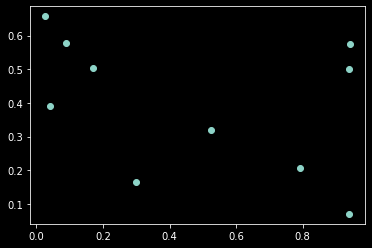

In [8]:
P = getRandomPoints(10)
L, K = P[1:], P[0]
plt.scatter(L[0], L[1])
E = np.array(crossiterate(K,K))
print(adjMatrix(E))

In [9]:
def sortPointsK(points): return points[:, points[0].argsort()]
def sortPointsX(points): return points[:, points[1].argsort()]
def sortPointsY(points): return points[:, points[2].argsort()]

In [10]:
def pIn(x,y, Y): return x*Y + y
def pX(t, Y): return (abs(t) - (abs(t)%Y))//Y
def pY(t, Y): return abs(t)%Y
def genSquareTri(X, Y):
    Points = np.array([[x,y] for x in range(X+1) for y in range(Y+1)])
    Tris = glue(
        np.array([[pIn(pX(t, Y), pY(t, Y)+1, Y+1), pIn(pX(t, Y)+1, pY(t, Y)+1, Y+1), pIn(pX(t, Y)+1, pY(t, Y), Y+1)]
        if t >= 0 else
        [pIn(pX(t, Y), pY(t, Y), Y+1), pIn(pX(t, Y), pY(t, Y)+1, Y+1), pIn(pX(t, Y)+1, pY(t, Y), Y+1)]
        for t in range(-X*Y+1, X*Y)]),
        [0, 1, Y+1])
    return Points[:,0], Points[:,1], np.array(Tris)

In [12]:
print(genSquareTri(3,4))

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]), array([[13, 14, 18],
       [12, 13, 17],
       [11, 12, 16],
       [10, 11, 15],
       [ 8,  9, 13],
       [ 7,  8, 12],
       [ 6,  7, 11],
       [ 5,  6, 10],
       [ 3,  4,  8],
       [ 2,  3,  7],
       [ 1,  2,  6],
       [ 1,  6,  5],
       [ 2,  7,  6],
       [ 3,  8,  7],
       [ 4,  9,  8],
       [ 6, 11, 10],
       [ 7, 12, 11],
       [ 8, 13, 12],
       [ 9, 14, 13],
       [11, 16, 15],
       [12, 17, 16],
       [13, 18, 17],
       [14, 19, 18],
       [ 0,  1,  5]]))


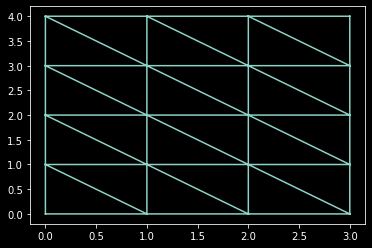

In [11]:
plt.triplot(*genSquareTri(3,4))